In [3]:
#Import libraries
import uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import time

#Load signal file
sig_file = uproot.open("user.calpert.mc16_13TeV.311423.MGPy8EG_A14NNPDF23_NNPDF31ME_HSS_LLP_mH600_mS150_lthigh.032123_trees.root/user.calpert.311423.e7357_e5984_s3234_r10201_r10210_p4696.32829947._000001.trees.root:trees_DV_")

In [4]:
def dp(branch):
    for i, value in enumerate(branch):
        print(branch[i])

In [5]:
def dp10(branch):
    for i, value in enumerate(branch[1:10]):
        print(branch[i])

In [6]:
def dp100(branch):
    for i, value in enumerate(branch[1:100]):
        print(branch[i])

In [7]:
def pct(branch):
    ratio = ak.count_nonzero(branch)/ak.count(branch)
    print(ratio)

In [36]:
#Import relevant branches
mdt = sig_file["MSVtx_nMDT"].array()#(entry_stop = 10)
rpc = sig_file["MSVtx_nRPC"].array()#(entry_stop = 10)
tgc = sig_file["MSVtx_nTGC"].array()#(entry_stop = 10)
eta = sig_file["MSVtx_eta"].array()#(entry_stop = 10)
ntrks = sig_file['MSVtx_nTrks'].array()

### MDT/TGC/RPC Hits

In [9]:
#Flatten arrays
MDT_flat =ak.flatten(sig_file["MSVtx_nMDT"].array())
RPC_flat = ak.flatten(sig_file["MSVtx_nRPC"].array())
TGC_flat = ak.flatten(sig_file["MSVtx_nTGC"].array())

<Figure size 432x288 with 0 Axes>

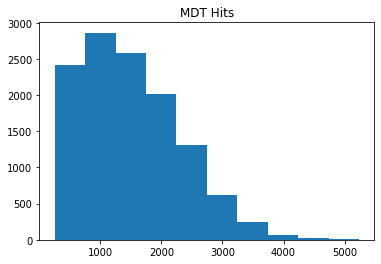

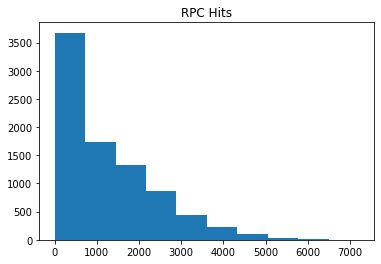

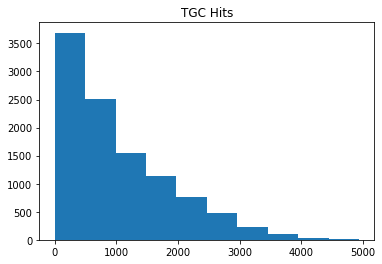

<Figure size 432x288 with 0 Axes>

In [10]:
#Plot a histogram of hits from all three sources. Include only nonnegative values
plt.hist(MDT_flat[MDT_flat>0], label = "MDT hits")
plt.title("MDT Hits")
plt.figure()
plt.hist(RPC_flat[RPC_flat>0], label = "RPC hits")
plt.title("RPC Hits")
plt.figure()
plt.hist(TGC_flat[TGC_flat>0], label = "TGC hits")
plt.title("TGC Hits")
plt.figure()

#### Barrel and Endcap cuts for MDT/TGC/RPC hits

In [15]:
#CUT FOR MDT AND RPC HITS IN BARREL
hits_barrel_cut= ((mdt > 300) & (mdt < 3000))\
& ((rpc > 250) & (abs(eta) < 1.0))

In [16]:
#CUT FOR MDT AND TGC HITS IN THE ENDCAP
hits_endcap_cut= ((mdt > 300) & (mdt < 3000))\
& ((tgc > 250) & ((abs(eta) > 1.0) & (abs(eta) < 2.5)))

In [22]:
#Check pct of hits that pass
pct(hits_barrel_cut)

0.07698333431251592


In [18]:
#Check pct of hits that pass
pct(hits_endcap_cut) *100

0.13555803615142079


### Filter events with minimum number of tracklets

In [41]:
#Discard erroneous values
good_trks = ntrks[ntrks > 0]

(array([2.246e+03, 2.160e+03, 1.912e+03, 1.528e+03, 1.205e+03, 9.110e+02,
        6.750e+02, 4.860e+02, 3.590e+02, 2.170e+02, 1.670e+02, 9.300e+01,
        5.500e+01, 5.300e+01, 2.700e+01, 1.300e+01, 1.100e+01, 7.000e+00,
        3.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 3.        ,  3.95833333,  4.91666667,  5.875     ,  6.83333333,
         7.79166667,  8.75      ,  9.70833333, 10.66666667, 11.625     ,
        12.58333333, 13.54166667, 14.5       , 15.45833333, 16.41666667,
        17.375     , 18.33333333, 19.29166667, 20.25      , 21.20833333,
        22.16666667, 23.125     , 24.08333333, 25.04166667, 26.        ]),
 <BarContainer object of 24 artists>)

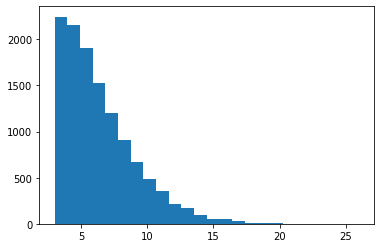

In [50]:
#Plot number of tracks per event
plt.hist(ak.flatten(good_trks), bins = ak.max(ntrks-2))

In [53]:
#Will need to check # of tracks per vertex. Make sure there are 3(4) in barrel(endcap)
ntrks_barrel = ntracks >=3
ntrks_endcap = ntracks>=4

In [55]:
#Calculate pct of events with ntrks > 3
pct(ntrks_barrel)

0.23762802812212366


In [56]:
#Calculate pct of events with ntrks > 4
pct(ntrks_endcap)

0.1936431467011339


#### Veto Region Cut

In [52]:
#CUT FOR VETO REGION
veto_cut = (0.7 < eta) & (1.3 > eta)

In [57]:
#Calculate pct of verticies that pass veto region
pct(veto_cut)

0.0368564322503574


### Final selection for good MS Vertices

In [59]:
goodMSvert_barrel = veto_cut & hits_barrel_cut & ntrks_barrel
goodMSvert_endcap = veto_cut & hits_endcap_cut & ntrks_endcap

In [62]:
#Calculate percent of vertices in barrel that make final cut
pct(goodMSvert_barrel)

0.015059828055539235


In [63]:
#Calculate percent of vertices in endcap that make final cut
pct(goodMSvert_endcap)

0.01225936588136224


In [64]:
#Calc # of good verticies in barrel
ak.count_nonzero(goodMSvert_barrel)

769

In [65]:
#Calc # of good verticies in endcap
ak.count_nonzero(goodMSvert_endcap)

626

### We have 769 good vertices in barrel and 626 good vertices in endcap